# DATA SCIENCE PROJECT:
### A DATABASE OF USED CARS WITH THEIR FEATURES, CONDITION AND PRICE IS PRESENT ONLINE
### USE DATA SCIENCE TO PREDICT PRICE OF A USED CAR DEPENDING ON ITS FEATURES AND CONDITION
#
#

# STEP 1: IMPORTING DATA
# LOADING DATA, UNDERSTANDING DATA

#
#
# LOADING DATA

In [1]:
import pandas as pd

In [2]:
# there is a dataframe in csv format at bellow mentioned url
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# saving the csv as a dataframe object, since no headers present so Header=None used
df = pd.read_csv(url,header=None)

# preview dataframe
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
# adding headers to columns

headers = ["symboling","normalized loses","make","fuel type","aspiration","no. of doors","body style","drive wheels","engine location",
           "wheel base","length","width","height","curb weight","engine type","no. of cylinders","engine size","fuel system","bore","stroke",
           "compression ratio","horse power","peak rpm","city mpg","highway mpg","price"]

df.columns=headers

df.head(13)

,symboling,normalized loses,make,fuel type,aspiration,no. of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horse power,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
# saving dataframe as csv on local machine in same location as this notebook

df.to_csv("car data.csv")

# if want to save at specific location
## path = "C:\Users\moeez\Desktop\GitHub Repositories\car data.csv"
## df.to_csv(path)

# UNDERSTANDING DATA

In [5]:
# getting data type of each column
# know what functions can be applied to what column
# helps in identifying column needing data type change

df.dtypes

symboling              int64
normalized loses      object
make                  object
fuel type             object
aspiration            object
no. of doors          object
body style            object
drive wheels          object
engine location       object
wheel base           float64
length               float64
width                float64
height               float64
curb weight            int64
engine type           object
no. of cylinders      object
engine size            int64
fuel system           object
bore                  object
stroke                object
compression ratio    float64
horse power           object
peak rpm              object
city mpg               int64
highway mpg            int64
price                 object
dtype: object

In [6]:
# statistical summary of numeric columns

df.describe()

,symboling,wheel base,length,width,height,curb weight,engine size,compression ratio,city mpg,highway mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
# summary of numeric and character columns

df.describe(include="all")

,symboling,normalized loses,make,fuel type,aspiration,no. of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horse power,peak rpm,city mpg,highway mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized loses   205 non-null    object 
 2   make               205 non-null    object 
 3   fuel type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no. of doors       205 non-null    object 
 6   body style         205 non-null    object 
 7   drive wheels       205 non-null    object 
 8   engine location    205 non-null    object 
 9   wheel base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb weight        205 non-null    int64  
 14  engine type        205 non-null    object 
 15  no. of cylinders   205 non-null    object 
 16  engine size        205 non

# STEP 2: DATA WRANGLING
## PRE-PROCESSING DATA, DATA FORMATTING, DATA NORMALIZATION
## DATA BINNING, CATEGORICAL TO NUMERIC

#
# PRE-PROCESSING DATA

In [9]:
# accessing columns in a data frame

df["symboling"] = df["symboling"]+0  # adds a zero to each value of symboling

In [10]:
# dealing with missing values
# ?, N/A, 0, NaN(not a number), blank cell

# solution 1: collect missing data
# solution 2: drop the variable
# solution 3: drop the single missing entry
# solution 4: guess the entry (average value, most common value etc.)
# solution 5: keep the entry blank/ missing

# if want to drop rows with missing price as that is what we are trying to predict
# use dropna function of panda
#print(df["normalized loses"][2])
#print(df["price"][9])
#print(df.at[0,"price"])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=["price"], axis = 0)   # drops entire row where price unknown, axis = 1 drops entire column
#print(df.at[2,"price"])
# df.dropna(subset=["price"],axis=0, inplace= True)  # inplace puts result back into original data frame. same achieved by df = df.dropna()
#df["price"]

In [11]:
# replace missing values of column normalized loses with mean value

# as normalized loses is object/ char first convert data type to numeric to find mean
df["normalized loses"] = pd.to_numeric(df["normalized loses"], errors='coerce')

mean_loss = df["normalized loses"].mean()      #(missing values skipped from total value and toatal count)

df.fillna(value=mean_loss, inplace=True)

# DATA FORMATTING

In [12]:
# put data in single format/ consistant format 

# if want to change mpg to L/100km
df["city mpg"] = 235/df["city mpg"]

df = df.rename(columns={"city mpg":"L/100km"})

# DATA NORMALIZATION

In [13]:
# making sure a variable doesn't have greater impact on the model due to its range

# eg a car height varies from 50 to 70 cm
# car length varies from 270 cm to 350 cm
# since length has greater value and range it would impact price prediction model more
# since height has smaller value and range it would impact price prediction model less
# in reality both height and length have same impact on price
# therefore to better compare variables having different range and values normalization is done
# eg giving both height and length values between 0 and 1 thus removing bigger value bias and larger range bias and thus making variables comparable

# how normalization done:

# solution 1: simple feature scaling = value/max value                  # result = 0-1
# solution 2: max-min = (value-min value)/(max value-min value)         # result = 0-1
# solution 3: z/standard score = (value-mean value)/standard deviation  # result = -0.3 - 0.3 (typically)

# normalize length

df["length"] = df["length"]/df["length"].max()

# DATA BINNING

In [14]:
# Data binning is dividing a variable into categories eg age into 1-5 yr, 5-10 yr, 10-15yr, 15-20 yr
# this helps incraese accuracy of prdeictive models and shows trends within categories, Also helps in visualization eg histograms

import numpy as np

bins = np.linspace( min(df["price"]),max(df["price"]), 4)   # divides prices from min to max in three sections

group_names = ["low","medium","high"]

df["price binned"] = pd.cut(df["price"], bins, labels=group_names)  # creates new binned column

df["price binned"]

0         low
1         low
2         low
3         low
4         low
        ...  
200       low
201    medium
202    medium
203    medium
204    medium
Name: price binned, Length: 201, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

# CATEGORICAL VARIABLE TO NUMERIC VARIABLE

In [37]:
# predictive models use numeric values so convert categorical variables (like diesel or petrol engine) into numeric variables (eg 0 for petrol and 1 for diesel)

# solution 1: one-hot encoding (eg 0 for petrol and 1 for diesel)

df_ft = pd.get_dummies(df["fuel type"])
print(df_ft)  # one column from "fuel type" to two columns diesel and gas

df_ft2 = df["fuel type"].replace({"diesel":1,"gas":2})
print(df_ft2)

     diesel  gas
0         0    1
1         0    1
2         0    1
3         0    1
4         0    1
..      ...  ...
200       0    1
201       0    1
202       0    1
203       1    0
204       0    1

[201 rows x 2 columns]
0      2
1      2
2      2
3      2
4      2
      ..
200    2
201    2
202    2
203    1
204    2
Name: fuel type, Length: 201, dtype: int64


# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
### FIND IMPORTANT VARIABLES AND RELATIONSHIP BETWEEN VARIABLES
#
# DESCRIPTIVE STATISTICS, GROUP-BY, ANOVA, CORELATION, NORMALIZATION, OUTLIERS

#
#
# DESCRIPTIVE STATISTICS

In [16]:
# before starting to apply complicated models, better to get sense of the data

# solution 1: descriptive analysis =>  df.describe()                           # only for numeric
# solution 2: descriptive analysis =>  df.describe(include = "all")            # for numeric and char
# solution 3: descriptive analysis =>  df["drive wheels"].value_counts()       # only for char
# solution 4: visualization        =>  boxplot, scatter plot 

# get descriptive analysis for drive train (drive wheels)

drivetrain = df["drive wheels"].value_counts()
drivetrain

fwd    118
rwd     75
4wd      8
Name: drive wheels, dtype: int64

<Axes: xlabel='drive wheels', ylabel='price'>

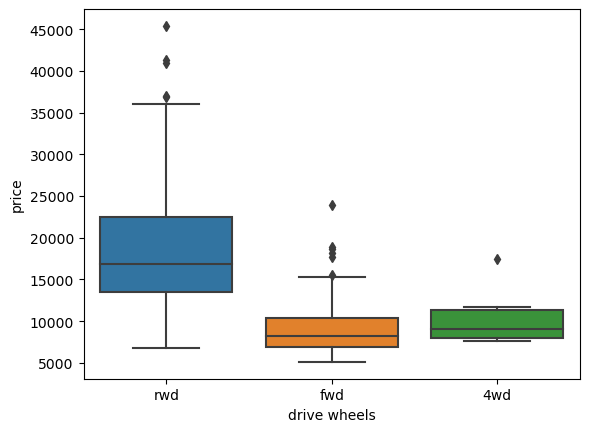

In [17]:
# visualize price against drivetrains using box plot

import seaborn as sns 
sns.boxplot (x="drive wheels", y="price", data=df)


Text(0, 0.5, 'price')

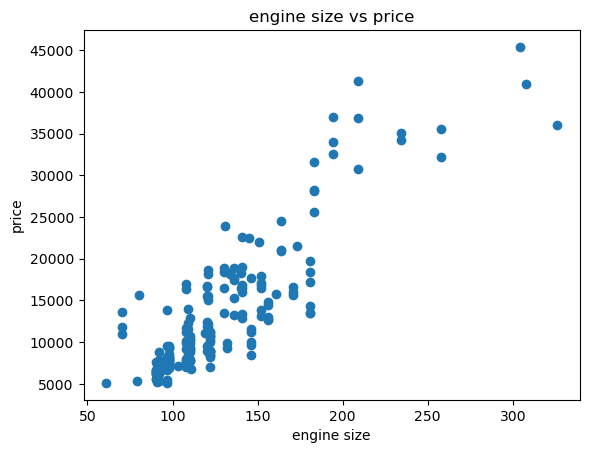

In [18]:
# visualize price against engine size using scatter plot

import matplotlib.pyplot as plt
y= df["price"]
x= df["engine size"]
plt.scatter(x,y)

# scatter plot formed, now labelling
plt.title("engine size vs price")
plt.xlabel("engine size")
plt.ylabel("price")


# GROUP-BY

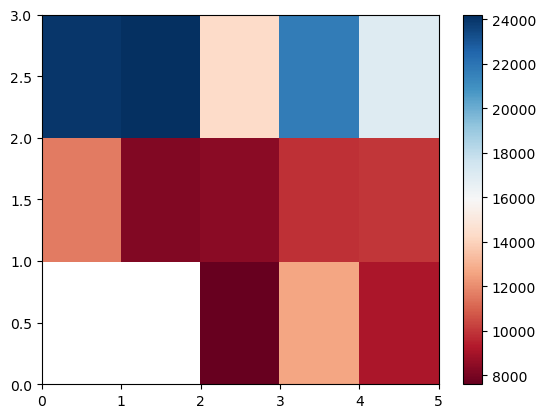

In [19]:
# create categories of single or multiple variables to understand data better
# df.groupby() is a panda function but only for categorical variables(body style, fuel type etc)

# see how drive wheel and body style affect price

df_test = df[["body style","drive wheels","price"]]     # now have new data set of only these columns

df_grp = df_test.groupby(["drive wheels","body style"],as_index=False).mean(numeric_only=True)   # as_index?

# create pivot table of above table

df_pivot = df_grp.pivot(index="drive wheels",columns="body style")
df_pivot

# convert pivot table into heat map
plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

# CORELATION

coff:-0.10154203145050206
p_value:0.15147575707430233


Text(0, 0.5, 'price')

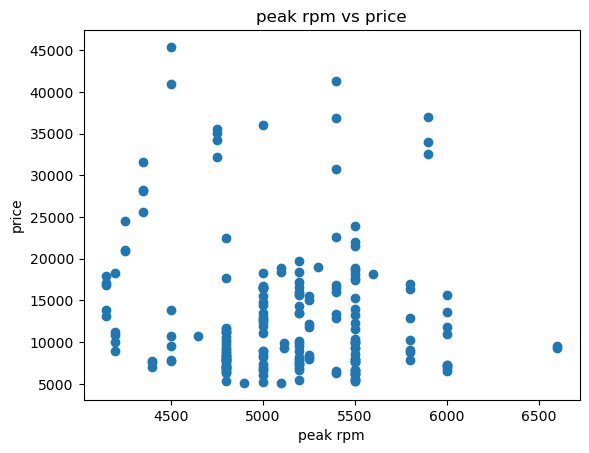

In [20]:
# corelation is not causation, but in data science focus more on corelation than causation
# corelation is which vaiables are interdependent(affect each other) and how much

# corelation in quantified using PEARSON CORELATION
# pearson corelation gives two values: corelation coefficient and p-value
# corelation coefficient indicates wheteher corelation exists or not (closer to -1,+1 strong corelation, 0 no corelation)
# p-value indicates certainty of results(P<0.001  strong certainty, P<0.05 moderate certainty, P<0.1 weak certainty, P>0.1 no certainty)

# case #1= positive linear corelation = as one variable increase, other also increase linearly
# case #2= negative linear corelation = as one variable increase, other decrease linearly
# case #3= weak corelation            = as on variable increase, the other variable remains unchanged or shows both increase and decrease for diffenet cases

# can create a heat map of corelation cofficients b/w all variables to see which variables affect desired variable or any other variable 

# corelation b/w price and peak rpm (weak corelation)
# since two variables and corelation needed, scatter plot used

df["peak rpm"] = pd.to_numeric(df["peak rpm"], errors='coerce')
mean_loss = df["peak rpm"].mean()      #(missing values skipped from total value and toatal count)
df["peak rpm"].fillna(value=mean_loss, inplace=True)

from scipy import stats
coff, p_value = stats.pearsonr(df["peak rpm"], df["price"])
print(f"coff:{coff}")
print(f"p_value:{p_value}")

y= df["price"]
x= df["peak rpm"]
plt.scatter(x,y)

# scatter plot formed, now labelling
plt.title("peak rpm vs price")
plt.xlabel("peak rpm")
plt.ylabel("price")

# Normalization

In [42]:
# sometimes range of variable too diffeerent
# normalization done
# eg default is (value-mean)/standard deviation

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
df_reshaped = df["compression ratio"].values.reshape(-1,1)  # need 2D array for generalization
x_scaled = scaled.fit_transform(df_reshaped)
print(x_scaled.size) # all entries in array 

201


In [51]:
# RESHAPE:

# Many functions generalized so cant take single input/ single column/ 1D array
# convert 1D to 2D array using reshape

import numpy as np

a = np.arange(10)  # creates an array of 10 elements
print(a,"\n")

# 1D to 2D array
b = a.reshape(2,5)  # new shape inputed
print(b,"\n")

# 2D to 1D array
c = b.reshape(10)
print(c,"\n")

d = c.reshape(-1,1)  # column should be one, row as many
print(f"d: {d}\n")

e = c.reshape(1,-1)  # row should be one, column as many
print(f"e: {e}\n")

[0 1 2 3 4 5 6 7 8 9] 

[[0 1 2 3 4]
 [5 6 7 8 9]] 

[0 1 2 3 4 5 6 7 8 9] 

d: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

e: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]



# OUTLIERS

In [ ]:
# WHEN TO LOOK FOR OUTLIERS, HOW TI FIND OUTLIERS AND WHAT TO DO WITH THEM?????

# STEP 4: MODEL DEVELOPMENT
### PREDICT REQUIRED VARIABLE USING DATASET AND EVALUATE PREDICTION (MODEL) (IN SAMPLE EVALUATION)
#
# LINEAR REGRESSION, EVALUATION (BY VISUALIZATION), POLYNOMIAL REGRESSION, EVALUATION (NUMERICAL), PREDICTION AND DECISION MAKING 

#
#
# LINEAR REGRESSION

In [21]:
# regression finds an equation/ relation/ model between predictor and target variables. this model is afterwars evaluated

# corelation vs regression
# corelation is finding interdependency betwenn two variables only but regression is between multiple variables
# corelation doesnt form an equation relating variables but regression modelss an equation(fit) of the relationship b/w variables
# so first corelation carried out to find significant variables (those that have strong corelation with target variable )
# and then significant variables used with target variable to carry out regression

# linear regression is used to find linear relationship b/w variables

# linear regression has two types: simple linear regression and multiple linear regression

# simple linear regression:
# two variables: independent(x) and dependent(y)
# a linear fit line formed b/w sample points  (fit used as samples may not be exactly in-line due to noise/ in significant variables, fit gives general trend,
#                                              removing effect of unnecessary effects)
# this line is used to predict(yhat) using given data(x)

# apply linear regression b/w highway mpg and price

# regression done using scikit library
from sklearn.linear_model import LinearRegression

# define dependent and independent variable
x= df["highway mpg"]
x = x.values.reshape(-1, 1) # x is a 1D array(series/list), we need to reshape it to a 2D array(1 column, many rows), as LinearRegression() generalized for multiple linear regression
y= df["price"] # y is a 1D array

# On the other hand, df.reshape(-1, 1) won't work directly on a DataFrame.
# This is because .reshape() is a method of NumPy arrays, not DataFrames.
# If you want to reshape a DataFrame, you should first access its underlying NumPy array with .values, as shown in df.values.reshape(-1, 1).

# create fit line
lm = LinearRegression()
lm.fit(x,y)

# predict value
x_predict = np.array([[30]]) # Reshape to a 2D array
lm.predict(x_predict)

# the fit formed here is of the type yhat= mx+ c        yhat= predicted value
# graphically a straight/linear line
# to find m: lm.coef
# to find x: lm.intercept

array([13771.3045085])

In [22]:
# multiple linear regression:
# one dependent variable(y)
# multiple independent variable(x)

# fit formed is of the type:    yhat= a+ b(x1)+ c(x2)
# graphically a plane =>  x1=x, x2=z, yhat=y

# apply multiple linear regression on price, highway mpg,engine size, curb weight, horsepower

# define all 4 independent variables/ predictors
df["horse power"] = pd.to_numeric(df["horse power"], errors='coerce')
mean_hp = df["horse power"].mean()      #(missing values skipped from total value and toatal count)
df["horse power"].fillna(value=mean_loss, inplace=True)


z = df[["highway mpg","curb weight","engine size","horse power"]]

# define dependent variable/ target and form fit
lm.fit(z, df["price"])

# obtain prediction
df_predict = pd.DataFrame({'highway mpg': [30], 'curb weight': [600], 'engine size': [1300], 'horse power': [40]})
# can also send in a matrix, multiple samples, each row a sample, prediction will also have same no. of rows, a prediction for each sample

lm.predict(df_predict)

# intercept and coef of fit can be found as:
# a   = lm.intercept
# b,c = lm.coef

array([138412.67712532])

# MODEL EVALUATION BY VISUALIZATION
### Purpose: to see if fit formed correctly captures the general trend between predictors(independent variables) and target(dependent variable)
### More the independent variables used, the better as noise reduced from ignored variables

<Axes: xlabel='highway mpg', ylabel='price'>

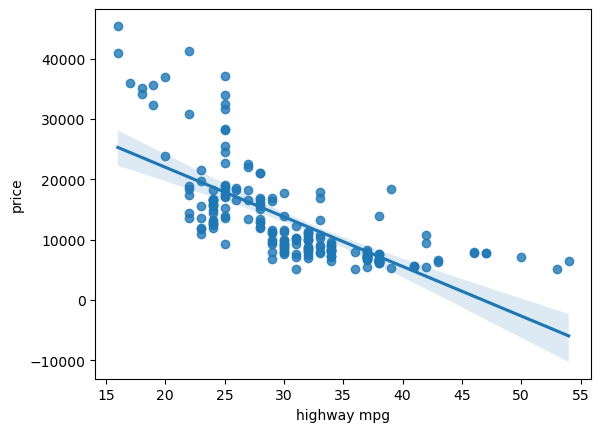

In [23]:
# regression plot:
# plot a scatter graph of predictor vs target, also draw the fit
# ADV: shows the trend b/w predictor and target, shows the fit, can judge directly whether fit ok or not
# DISADV: only possible for single predictor vs single target, doesn't quantify how much the fit is ok

# regression plot different from scatter plot as it also draws the fit, which scatter plot doesn't have

import seaborn as sns
sns.regplot(x="highway mpg",y="price",data=df)

<Axes: xlabel='highway mpg', ylabel='price'>

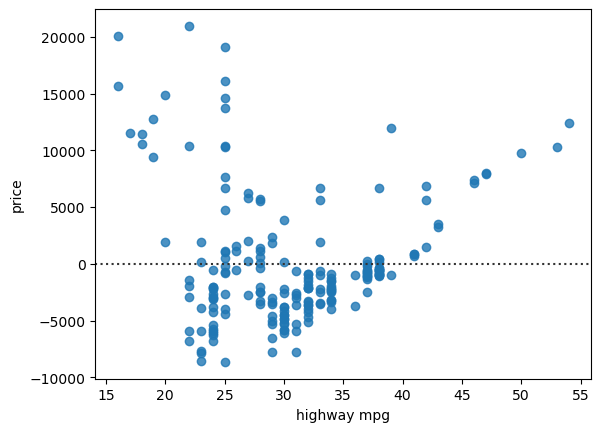

In [24]:
# residual plot:
# fit has point both above and below it
# residual plot shows the error b/w actual and fit/ predicted value called residual
# if errors/ residuals evenly distributed about a mean then model ok
# if errors/ residuals shows a trend then model is not ok(means the actual points are showing a trend, not followed by fit)
# ADV: tells if fit not following any trend, multiple predictors possible as graph only between fit and actual
# DISADV: doesn't quantify model quality

sns.residplot(x=df["highway mpg"], y=df["price"])

d:\anaconda\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


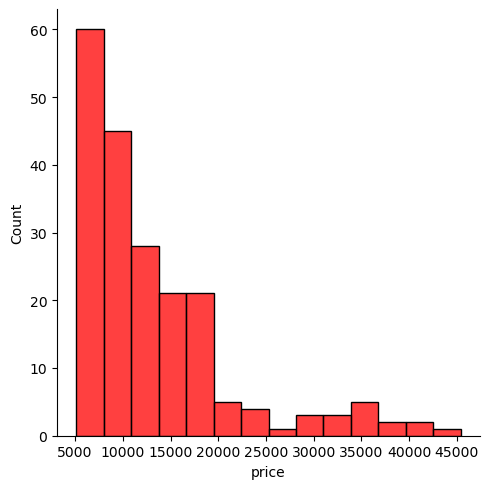

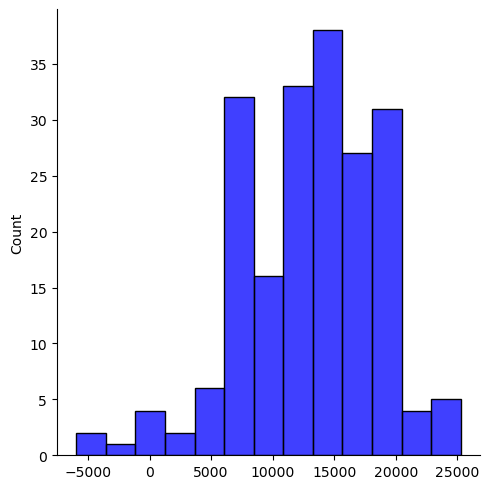

In [25]:
# distrinution plot
# graphs actual vs fitted values for all no. of observations/ samples
# more the graphs match better the model
# if a section not matches significantly, then problem, if consistently fitted price different from actual then changes need to be done
# ADV: the most rigorous test to check if model ok, multiple predictors possible as graph only between fit and actual
# DISADV: doesn't quantify model quality

# define dependent and independent variable
x= df["highway mpg"]
x = x.values.reshape(-1, 1) # x is a 1D array, we need to reshape it to a 2D array, as LinearRegression() generalized for multiple linear regression
y= df["price"] # y is a 1D array

# create fit line
lm = LinearRegression()
lm.fit(x,y)

# predict value
x_predict = np.array([[30]]) # Reshape to a 2D array
yhat = lm.predict(x)

ax1 = sns.displot(df["price"],color="r",label="actual value") # hist= true will give histograms of actual and fitted instead of continuous curve
sns.displot(yhat,color="blue",label="fitted value",ax=ax1)

# POLYNOMIAL REGRESSION

In [39]:
# if linear regression model is evaluated to be not following data trend, then use polynomial regression

# polynomial regression: 
# finds the relationship of polynomial/curvilinear nature(quadratic and above) between predictor and target variables

# we can create a polyynomial of any degree to create fit over given actaual values/ samples
# the smallest order polynomial that gives satisfactory fit(evaluated to be ok) is chosen

# create a polynomial fit b/w highway mpg and price of 3rd order(cubic relationship)    # eg   yhat = a(x^3)+ b(x^2)+ cx+ d      # a.b.c are weights and d is called bias

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=3)  # object for polynomial regression created
df_poly = df["highway mpg"] # getting training data to predict y=df["price"]
df_poly = df_poly.values.reshape(-1, 1) # polynomial features generalized for multiple predictors so reshape tom create 2D array(whereas 1D array would be a series ie single row, but need multiple rows each for one sample)
x_poly = pr.fit_transform(df_poly)   # need to transform data to apply polynomial regression
pr.fit(x_poly,y) # creating/ training model model

PolynomialFeatures(degree=3)

In [35]:
# create a polynomial fit b/w highway mpg, engine size, horsepower, curb weight and price of 3rd order(cubic relationship)
# eg polynomial fit of quadratic relationship(2nd order) b/w 2 predictors(2 dimensional) and one target  yhat = a(x1^2)+ b(x2^2)+ c(x1x2)+ dx1+ ex2+ f

# this is a multiple predictor/ multi-dimensional polynomial regression
# numpy's polyfit only for single predictor
# for multi-dimensional polynomial regression use scikit-learn

# first prdictors are taken and polynomially transformed i.e.  x1, x2 --> x1^2, x2^2, x1x2, x1, x2
# then x1^2, x2^2, x1x2, x1, x2 and y used to carry out multiple linear regression 

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=3)  # object for polynomial regression created
df_poly = df[["horse power","curb weight","engine size","highway mpg"]] # getting training data to predict y=df["price"]
x_poly = pr.fit_transform(df_poly)   # need to transform data to apply polynomial regression
pr.fit(x_poly,y) # creating/ training model model

In [ ]:
# variables--> normalization--> polynomial transform--> linear regression
# ^---------- TRANSFORMATION ----------------------^   ^-- PREDICTION --^

from sklearn.preprocessing import PolynomialFeatures     # for polynomial transformation
from sklearn.linear_model import LinearRegression        # for linear regression
from sklearn.preprocessing import StandardScaler         # for normalization
from sklearn.pipeline import Pipeline                    # to create pipeline = a way to summarize to make prediction code comprehensive

input = [("Scale",StandardScaler()),("model",LinearRegression()),("name",function()),("",),("",)]

pipeline_object = Pipeline(input)

Pipe.fit(df[["horsepower"],["highway mpg"]],y)
yhat = pipe.predict(X[["horsepower"],["highway mpg"]])

NameError: name 'function' is not defined

# EVALUATION (NUMERICAL)

In [ ]:
# Solution 1: Mean Squared Error (MSE)  
# Solution 2: Coefficient of Determination (R^2)

# MSE:
# ((y1-yhat1)^2 + (y2-yhat2)^2)/n                        # MSE >= 0, smaller the MSE the better

# R^2:
# R^2 = (1 -(MSE(y, yhat)/ MSE(y, ymean)))               # 0< R^2 < 1, closer to 1 the better

# R^2 is less sensitive to outliers than MSE, prefer R^2


from sklearn.metrics import mean_squared_error
mean_squared_error(actual value, predicted value)

# PREDICTION AND DECISION

In [ ]:
# solution 1: prdiction makes sense
# solution 2: evaluation (by visualization)
# solution 3: evaluation (numerical)
# solution 4: compare with other models
# and then form decision on model 

# use an array of multiple values to use as input to get many predicted outpus which will then be used for model evaluation
new_input = np.arange(1,201,1).reshape(-1,1)        # purpose of reshape? something to do with array dimensions?

# STEP 5: MODEL EVALUATION AND REFINEMENT
### STEP 4 IS TO SEE HOW GOOD OF A FIT FORMED WHILE STEP 5 IS TO CHECK HOW GOOD A PREDICTION MADE BY MODEL
### OUT OF SAMPLE EVALUATION
#
# MODEL EVALUATION AND REFINEMENT, OVER/ UNDER FITTING, RIDGE REGRESSION, HYPERPARAMETERS

#
# MODEL EVALUATION AND REFINEMENT

In [ ]:
# a model can be overfit(eg joining each point by 10 degree polynomial, while trend is quadratic, happens when variable>observations)
# or underfit(trend not followed) on the data,
# this will not work well on general data (predictions will be poor)

# this problem can be visualized by graphing actual points vs predicted points
# predicted value line curve and actual value points

# to counter this problem:
# solution 1: test train split
# solution 2: k fold cross validation

# hyperparameters also used to adjust over/ underfit

In [ ]:
# SOLUTION 1: TRAINING AND TESTING SETS       PREFER THIS
# Whole data divided into two parts. The bigger(Training set) and the smaller(25-30%)(testing set) part
# model built(trained) on training set and fit evaluated
# then testing set used to see how well can predict
# afterwards training and testing sets combined and model trained on combined set to get best results

from sklearn.model_selection import train_test_split                   # randomly splits data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)   # training/testing 70/30 split, random_stae purpose?

In [ ]:
# Generalization error/ Out of sample error:
# error in predicting unseen values
# this is the error which will be seen in predicting real world scenarios
 
# perform randomly choosing training and testing routine
# use the error in predicting testing set to get an estimate of the generalization error
# if very little testing data used, then generalization error will be small(precise results) but will not be close to real world performance(less accurate) 

In [ ]:
# Solution 2: Cross Validation:
# Divide dataset into k equal parts
# Each time use 1 part as testing and others for training
# once all parts have been used as testing
# use average results/ fit from all models to get out of sample error/ generalization error


# to get mean r score from cross validation:
from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model used eg lr for linear regression, predictors, target, no. of partitions)

scores = cross_val_score(lr, x_data, y_data, cv=3)

# scores will be an array of 3 fits

np.mean(scores)

# to get predicted values from cross validation:
from sklearn.model_selection import cross_val_predict

# values = cross_val_predict(model used eg lr for linear regression, predictors, target, no. of partitions)

values = cross_val_predict(lr, x_data, y_data, cv=3)   # all predicted values from each test set combined

# OVER/ UNDER FITTING

In [ ]:
# 100 data point in cubic distribution
# can be modeled on linear, cubic or 99th degree polynomial

# linear will be underfitting                 = large generalization error/test error   large training error
# 99th order polynomial will be over fitting  = large generalization error/test error   minimal training error

# correct fitting i.e. cubic will produce the smallest generalization error/ test error and small training error

# RIDGE REGRESSION

In [ ]:
# if one OVerfits to the training data, then worse performance is shown on test data and ultimately worse performance in real world situations
# by reducing overfit, we get poorer performance on training data but better performance on test data and real world situations
# overfit is reduced by introducing a bias called alpha as in:
# yhat = alpha*a(x1^2) + alpha*b(x2^2) + alpha*c(x1x2) + alpha*d(x1)+ alpha*e(x2) + alpha*f

# use ridge regression over ploynomial regression when predictors >= observations/ samples, predictors are corelated  --> this results in overfit

# not choosing correct value of alpha can result in either non removal of overfit or underfit
# to choose correct alpha, use multiple alpha, apply model on test data, find MSE or R^2 each time and choose appropriate alpha

from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(X,y)

yhat.RidgeModel.predict(X)

# use grid search(can also use random search) to speed up finding correct alpha value
# several alpha values, ridge regression function, no. of folds, get mean R^2 values

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{"alpha":[0.01,0.1,1]}]    # can also send in other hyperparameters eg normalize true, false. will get R^2 values for all alpha with and without normalizing variables
RR = Ridge()     # ridge regression object
Grid1 = GridSearchCV(RR,parameters1,cv=4)  # creating folds and and telling to apply rige regression with given alpha values
Grid1.fit(x_data[["horsepower","hihgway mpg"]],y_data)   # sending in data and creating fit
Grid1.best_estimator_                                    #  ??????????
scores=Grid1.cv_results_                                 # array of R^2 scores
scores["mean_test_score"]                                # mean R^2 score

# HYPERPARAMETERS

In [ ]:
# Two parameters exist for a model: internal and external

# internal parameters are found using training data   eg weights and biases 

# external parameters are found by hit and trial/ optimization to get best best model  eg alpha
# external parameters are called hyperparameters and are used to fine tune models

# hyperparameters found by grid search or random search